# **Project: Providing data-driven suggestions for HR**

## Description and deliverables

The object of analysis for this project will be a corporative dataset with the goal of building a predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

The deliverables will include the model evaluation (and interpretation if applicable), a data visualization(s)  directly related to the question in matter , ethical considerations, and the resources used to troubleshoot and find answers or solutions.


# **PACE stages**


## **Pace: Plan**

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

###  Exploring the HR dataset

The dataset contains 15,000 rows and 10 columns for the variables listed below. 

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

### Relevant questions 

- What are we trying to solve or accomplish?
> The main goal is to produce a predictive model that will help the mentinoed company to avoid and understand effects of turnover.
- What are some initial observations upon data exploration?
> The data set seems to have various features for analysis, but further exploration will be done.
- Are there ethical considerations in this stage?
> Yes. A model that influences hiring policies might have direct impact on the life of professional that aspire to make part of the company or that are already part of it.


## Part 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [29]:
#IMPORT PACKAGES

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

### Load dataset

In [30]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")

# Display first few rows of the dataframe
df0.head(10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Part 2. Data Exploration (Initial EDA and data cleaning)

- Understand the variables
- Clean the dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [31]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [32]:
# Gather descriptive statistics about the datadf
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [33]:
# Display all column names
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [34]:
# Rename columns as needed
df0 = df0.rename(columns={'Work_accident': 'work_accident','average_montly_hours': 'average_monthly_hours','time_spend_company': 'tenure', 'Department': 'department'})

# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [35]:
# Check for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

As it is possible to see, no missing values are present in the dataset.

### Check duplicates

Check for any duplicate entries in the data.

In [36]:
# Check for duplicates
df0.duplicated().sum()

3008

About 20% of the data are duplicates, corresponding to 3008 rows.

In [37]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [38]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df_noDup = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe 
df_noDup.head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


Before dropping the duplicates, it is valid to consider their possible validity (that is, two employees have exactly the same fields in the dataset). In that matter, a likelihood analysis with Bayes' theorem could be applied, but the number of fields (10) indicates that this probability is very low. Therefore, resources will be saved by dropping the duplicates.

### Check outliers

Check for outliers in the data.

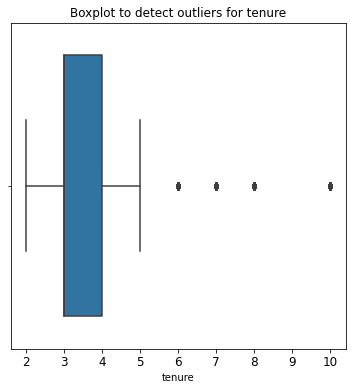

In [39]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df_noDup['tenure'])
plt.show()

It seems like there are some outliers in the dataset, which will be more deeply analyzed below.

In [40]:
# Determine the number of rows containing outliers

# 25th and 75th percentile for 'tenure'
perc25 = df_noDup['tenure'].quantile(0.25)
perc75 = df_noDup['tenure'].quantile(0.75)

#interquantile range
itequant_range = perc75 - perc25 

#computer upper and lower limit for outliers
lower_lim = perc25 +- 1.5*itequant_range
upper_lim = perc75 + 1.5*itequant_range

#catch subset with outliers 
subset_outliers = df_noDup[(df_noDup['tenure']>upper_lim) | (df_noDup['tenure']<lower_lim)]

print(f"amount of rows with tenure outliers: {len(subset_outliers)}")

amount of rows with tenure outliers: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage

## Part 2.2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [41]:
# Get numbers of people who left vs. stayed
print(df_noDup['left'].value_counts())

# Get percentages of people who left vs. stayed
print(df_noDup['left'].value_counts(normalize=True))

0    10000
1     1991
Name: left, dtype: int64
0    0.833959
1    0.166041
Name: left, dtype: float64


About 16.6% of employees in the study left. This might indicate some imbalance in the dataset, situation that might require further analysis.

### Data visualizations

Now, let's examine variables that we are interested in, and create plots to visualize relationships between variables in the data.

Firstly, we will compare people who left (1) and people who did not (0) in terms of month hours per project and number of projects.

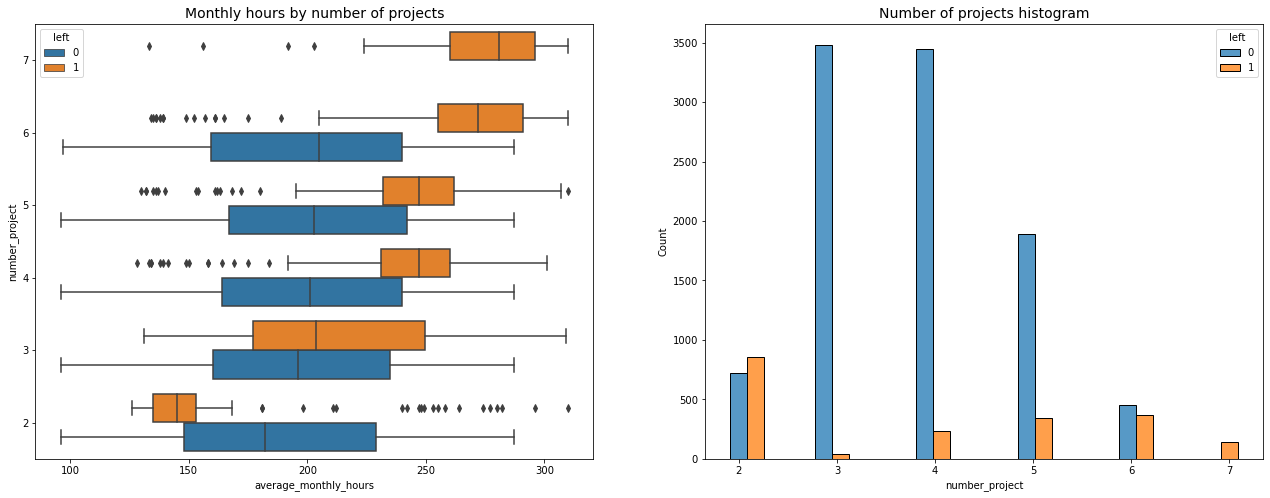

In [42]:
#  compare people who left (1) and people who did not (0) in terms of month hours per project and number of projects.

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df_noDup, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = df_noDup[df_noDup['left']==0]['number_project']
tenure_left = df_noDup[df_noDup['left']==1]['number_project']
sns.histplot(data=df_noDup, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

# Display the plots
plt.show()

In [43]:
df_noDup[df_noDup['number_project'] == 7]['left'].value_counts()

1    145
Name: left, dtype: int64

From the plots, two partitions of the data stress out:
* 1. Employees that worked substantially less than the mean: in this group, it is reseonable to suppose that those who left were likely fired (due to lack of productivity and results in their projects) or about to quit (and were assinged less hours).
* 2. Employees that worked substantially more than the mean: in this group, it is reseonable to suppose that those who left likely quit (possibly due to overwork). This might indicate why all employees with 7 projects left the company, while almost half of those with 6 also did.
* From that, it seems like the optimal number of projects per employee is 3 or 4, situation in which rates of leaving the company are low
* Assuming a work week of 40 hours and two weeks of vacation per year, then the average number of working hours per month of typical employees working Monday–Friday would be about 166 hours. Most of the workers in the study work more than that, indicating overwork.

Next, satisfaction levels vs working hours will be analyzed.

Text(0.5, 1.0, 'Monthly hours (last evaluation)')

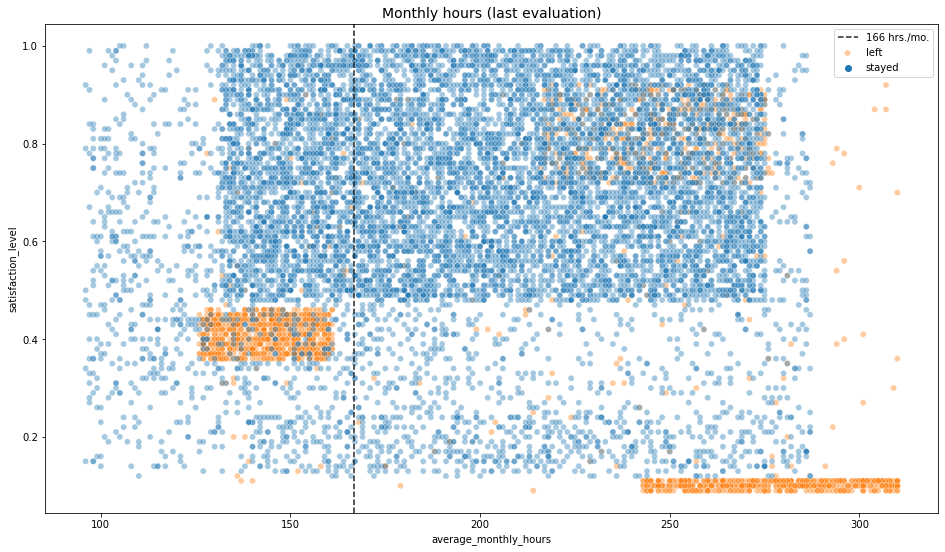

In [44]:
# satisfaction levels vs working hours plot
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df_noDup, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#252525', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours (last evaluation)', fontsize='14')

It is possible to assess:
* The most oveworked group (~240–315 hours per month) of employees had the lowest satisfaction rates, which makes sense. The other group of people who left, however, had more normal working hours and it is harder to speculate the reason for relatively low satisfaction levels. 
Now, we turn to satisfaction levels by tenure.

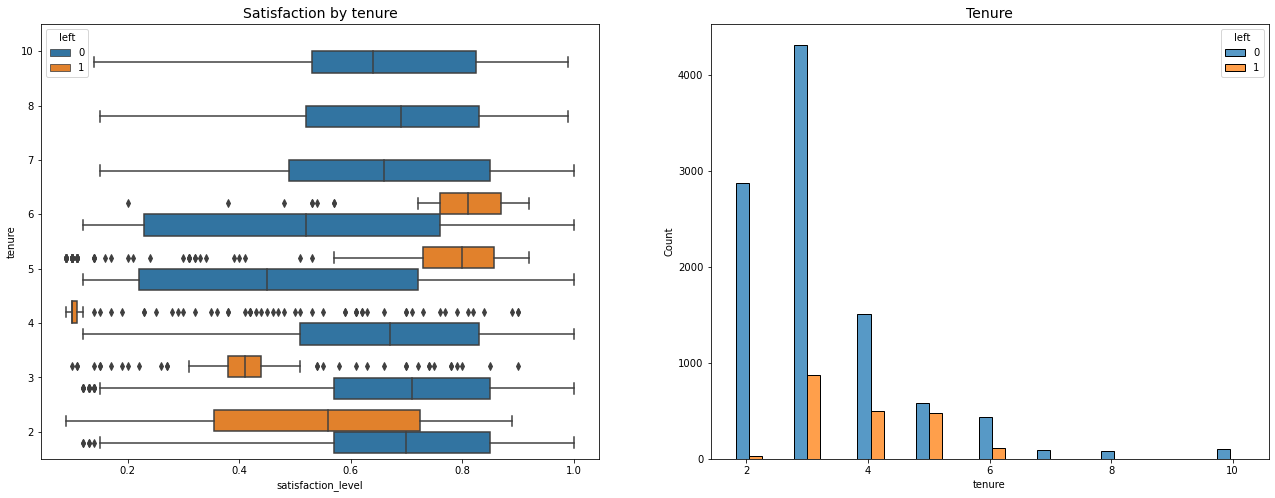

In [45]:
# plot of satisfaction levels by tenure
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=df_noDup, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')

# Create histogram showing distribution of `tenure`, comparing employees who stayed versus those who left
tenure_stay = df_noDup[df_noDup['left']==0]['tenure']
tenure_left = df_noDup[df_noDup['left']==1]['tenure']
sns.histplot(data=df_noDup, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure', fontsize='14')

plt.show();

It is possible to note:
* In the "left category", there are both employess with low and medium-high satisfaction levels. However, year 4 presents very low satisfaction levels for employees who left, fact that could be analyzed along with the policies and changes in action at the company in year 4.
* There are relatively few long-ternure employees in the company (maybe due to the elevated levels of turnover), but those have high satisfaction levels. 
<br>
Now, safisfaction levels will be more analyzed.

In [46]:
# safisfaction level mean and median 
df_noDup.groupby(['left'])['satisfaction_level'].agg([np.mean, np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


Employees who left have lower satisfaction levels.
Next in the analysis, salary will be analyzed given that it is likely to be an importnat factor for workers retention

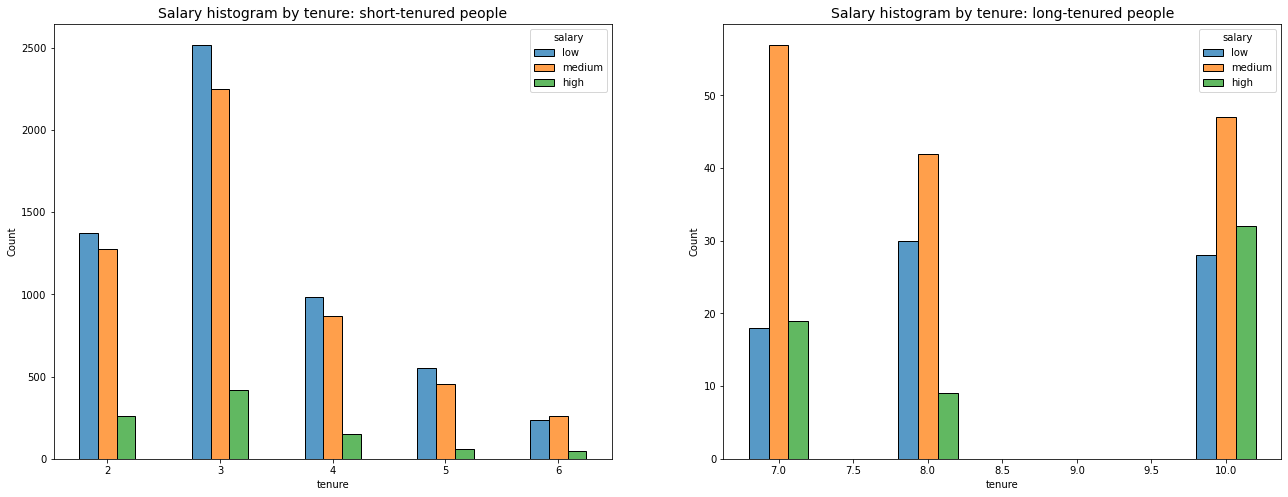

In [47]:
# Plotting salary
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured employees
tenure_short = df_noDup[df_noDup['tenure'] < 7]

# Define long-tenured employees
tenure_long = df_noDup[df_noDup['tenure'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14');


Long-ternure workers also have high proportions on low medium and even low salaries, so salary alone does not seem enough to explain differences in satisfaction levels by ternure (despite the necessity for more careful evaluation).
<br>
Now, in order to access perception of being valuable and rewarded, let´s examine evaluation scores and working hours.

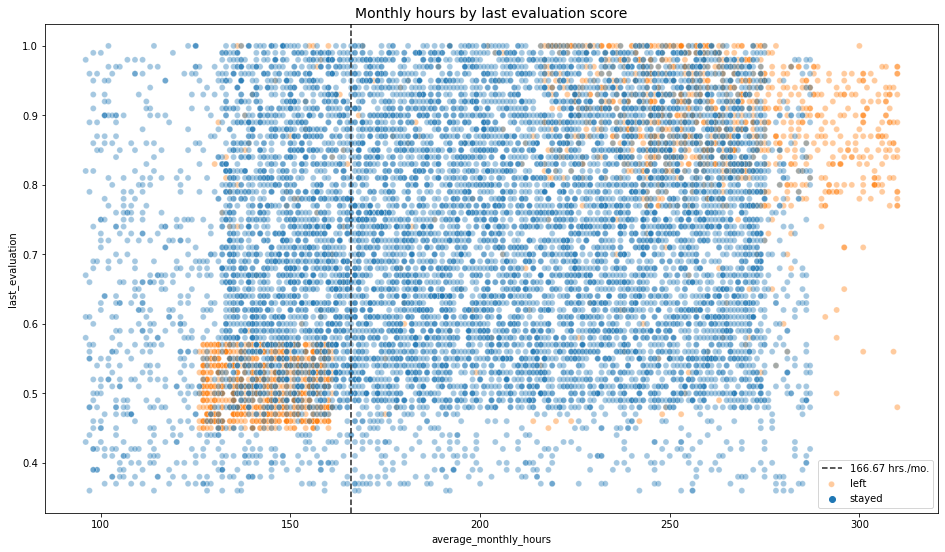

In [48]:
# evaluation scores vs working hours.

# Create scatterplot of `average_monthly_hours` versus `last_evaluation`
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df_noDup, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166, color='#252525', label='166 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

The two variables seem positivelly correlated. It seems, again, that overworked employees and employees with less work are two identifiable groups. While the latter had lower scores (due, maybe, to lack of production), while some overworked workers did not receive high evaluation scores.
<br>
To further analyze the presented issue, let's turn our attention to the relationship between working hours and recent promotions.

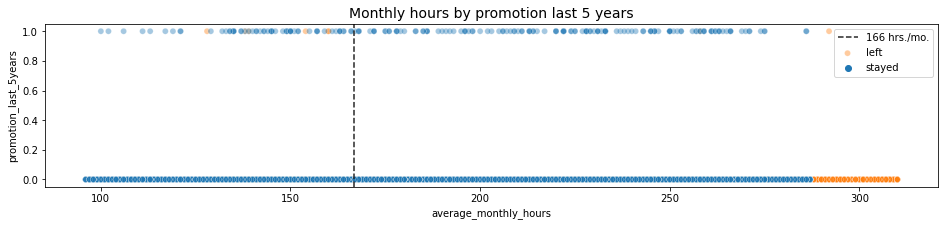

In [49]:
# plot working hours and recent promotions. 
# Create plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df_noDup, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#252525', ls='--')
plt.legend(labels=['166 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

This shows that very few promote workers left the company, while few overworked employees were promoted (and this group represents basically everyone that left).
<br>
Now, we analyze if department divisions seem to have influence in employee retention.

In [50]:
#distribution of employees per department

print(df_noDup['department'].value_counts())
print('----------------------')
print(df_noDup['department'].value_counts(normalize=True))

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64
----------------------
sales          0.270119
technical      0.187140
support        0.151864
IT             0.081394
RandD          0.057877
product_mng    0.057210
marketing      0.056125
accounting     0.051789
hr             0.050121
management     0.036361
Name: department, dtype: float64


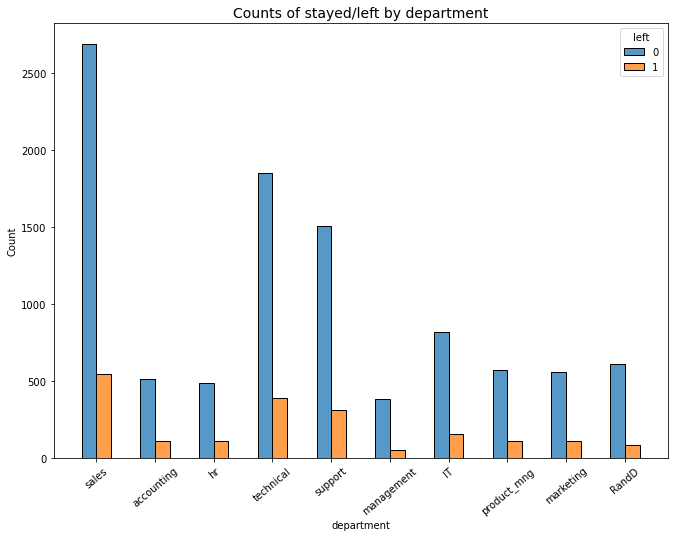

In [51]:
plt.figure(figsize=(11,8))
sns.histplot(data=df_noDup, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation='40')
plt.title('Counts of stayed/left by department', fontsize=14);

While there is somme variance in terms of percentage of people who left per department, such difference does not seem very substancial.
<br>
Now that we have a general understanding of the data, it is necessary to check for correlation in the data.

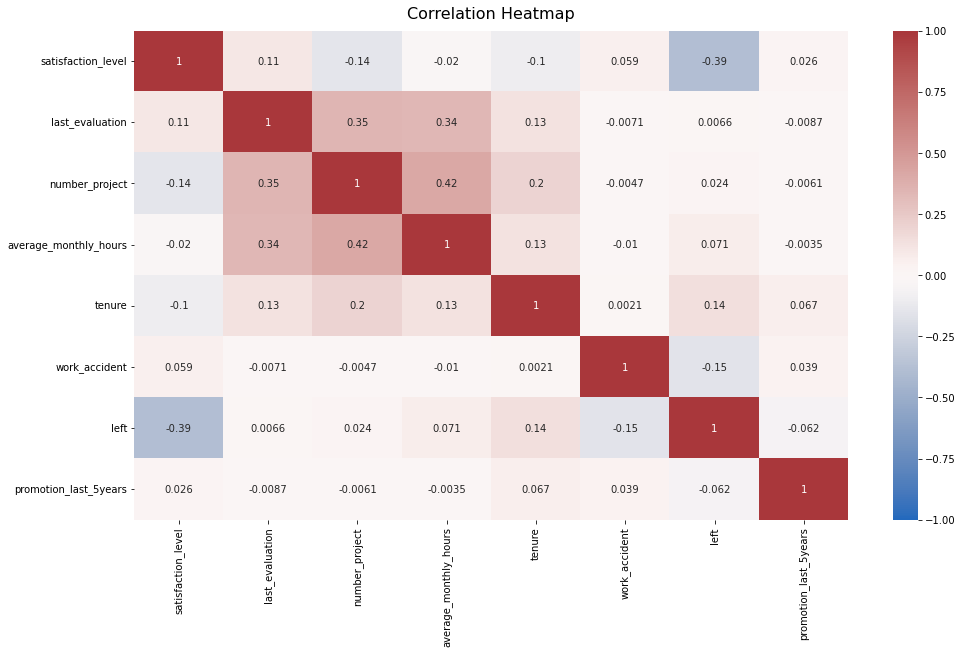

In [52]:
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':16}, pad=12);

* Negative correlation: left and satisfaction level
* Positive correlation: number of project, monthlyl hours, evaluation scores (makes sense, considering our previous analysis)
<br>
However, the correlation in general are not very high, diminishing concerns with multicolinearity and high correlation.

### Insights

Up to now, it seems like long-ternured workers (6+ years) are less likely to leave. However, it is possible to suppose that poor working environment and management are strong candidates to explain turnovers. Leaving is related to long working hours, overly demanding amount of projets, and low satisfaction levels.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data
<br>
As logistic classifiers tend to be most suitable for binary variables (like 'left'), let's recall some assumptions for such type of model (more specifically, logistic regression and tree-based models)


## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size

**Tree-based Machine Learning model assumptions**
- No multicollinearity
- No high occurence of noise and outliers.
- Data has sufficient samples.
- Ideally, no constraints on the shape of the decision boundary.

### Relevant questions

- Which independent variables were chosen?
> Considering all the analysis and models that will be built, only `left` was not used as independent variables (it was the dependent variable).
- Are the assumptions met?
> In general, the assumptions are met within a satisfactory degree. 

## Part 3. Model Building, Part 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

Binary classfication. The employee either left the company (1) or did not (0).

### Identify the types of models most appropriate for this task.

As indicated before, logistic regression and tree-based classifiers.

### Modeling: Logistic Regression model

Let´s begin by copying the dataframe and transforming the data

In [53]:
#copy data
df_lr = df_noDup.copy()

#transform "salary" to ordinal number
df_lr['salary'] = ( df_lr['salary'].astype('category')
                  .cat.set_categories(['low', 'medium','high']).cat.codes)

#transform 'department' field
df_lr = pd.get_dummies(df_lr, drop_first=False)

df_lr.head(5)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


Now, it is possible to assess the correlation among the variables using a heatmap.

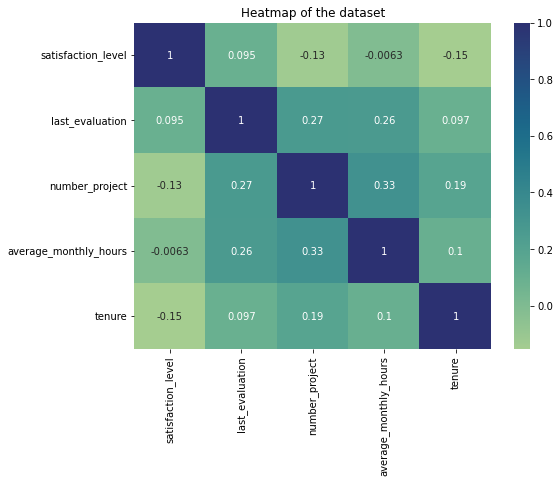

In [54]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_lr[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

Some pair of features present positive correlations such as 0.33, 0.27, but their values make it is safe to consider that multicollinearity will not be a problem. Now, let´s take a look at the distribution of employees by department.

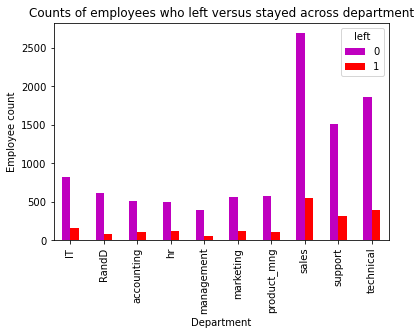

In [55]:
pd.crosstab(df_noDup['department'], df_noDup['left']).plot(kind ='bar',color='mr')
plt.title('Counts of employees who left versus stayed across department')
plt.ylabel('Employee count')
plt.xlabel('Department')
plt.show()

Because of the model's sensitivity to outliers, those will be checked next.

In [56]:
#create derived detaframe that does not have outliers 
df_lr_noOutl = df_lr[(df_lr['tenure'] >= lower_lim) & (df_lr['tenure'] <= upper_lim)]
df_lr_noOutl.head(5)


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


Now, we can properly select outcome and predictor variables. Then, the data is split in training and testing data sets.

In [57]:
#dependent/outcome variable
y = df_lr_noOutl['left']

#independent/predictor variable
x = df_lr_noOutl.drop('left', axis=1)

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y, random_state=42)

Build model and fit the data.

In [59]:
model_lg =LogisticRegression(random_state=42, max_iter=500).fit(x_train, y_train)

Test the model with test data and build a confusion matrix for more precise evalution.

In [60]:
#predictions on test data
preds = model_lg .predict(x_test)

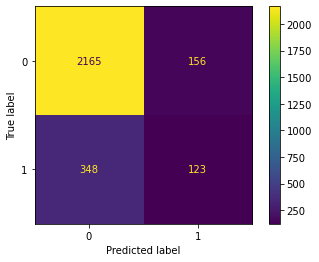

In [61]:
#confusion matrix
# Compute values for confusion matrix
log_conf_m = confusion_matrix(y_test, preds, labels=model_lg.classes_)

# Create display of confusion matrix
log_fig = ConfusionMatrixDisplay(confusion_matrix=log_conf_m, 
                                  display_labels=
                                 model_lg.classes_)

# Plot confusion matrix
log_fig.plot(values_format='')

# Display plot
plt.show()

In a premilinary analysis, it is possible to see that the model presents more false positives than false negatives. Moreover, the number of incorrect predictions is not high, but not irrelevant. To get more insights in this regard, let´s check class balance.

In [62]:
print(df_lr_noOutl['left'].value_counts(normalize=True))
print('=-=-=-=-=-=-=-=-=-=-=-=-')
print(df_lr_noOutl['left'].value_counts())

0    0.831468
1    0.168532
Name: left, dtype: float64
=-=-=-=-=-=-=-=-=-=-=-=-
0    9285
1    1882
Name: left, dtype: int64


There is some class imbalance, but not enough to make class rebalance necessary. Moreover, keeping the data is its current state will ensure increased data integrity and realistic fit. Now, let´s turn our attention to some evaluation metrics.

In [63]:
index_names = ['Predicted: not leave', 'Predicted: would leave']
print(classification_report(y_test, preds, target_names=index_names))

                        precision    recall  f1-score   support

  Predicted: not leave       0.86      0.93      0.90      2321
Predicted: would leave       0.44      0.26      0.33       471

              accuracy                           0.82      2792
             macro avg       0.65      0.60      0.61      2792
          weighted avg       0.79      0.82      0.80      2792



Therefore, we have (weighted averages):
- Precision: 79% 
- Recall: 82%
- F1-score: 80%
- Accuracy: 82%.
<br>
At a first analysis, the model seems robust. However, it is resoanable to interpret that failing to predicting employees who are likely to leave is constly to the organization and, therefore, a stronger recall is desired.
<br>
<br>
Now, a tree-based classifier will be build in order to achieve stronger results.

### Modeling: Tree-based classifier model

First, let's transform the data fields as needed to fit the model and select both outcome (dependent) and predictor (independent) variables.

In [64]:
#transform dataset to better fit the model requirements
df_tb = df_noDup.copy()

#transform "salary" to ordinal number
df_tb['salary'] = ( df_tb['salary'].astype('category')
                  .cat.set_categories(['low', 'medium','high']).cat.codes)
#transform 'department' field
df_tb = pd.get_dummies(df_tb, drop_first=False)

df_tb.head(5)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [65]:
#Isolate outcomme (dependent) variable and predictors

#dependent variable
y = df_tb['left']

#independet variables (predictors)
x  = df_tb.drop('left',axis=1)

Now, let's split the data so it is prepared to model.

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y, random_state=0)

Firstly, a decision tree will be built.

In [67]:
#instanciate tree model
model_tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8,11, None],
             'min_samples_leaf': [2, 5, 1, 7, 9],
             'min_samples_split': [2, 4, 6, 9]
             }

# Define scoring metrics 
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree_gs = GridSearchCV(model_tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

Fit model to the training data.

In [68]:
tree_gs.fit(x_train, y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, 11, None],
                         'min_samples_leaf': [2, 5, 1, 7, 9],
      

Analyse the optimal parameters.

In [69]:
tree_gs.best_params_

{'max_depth': 4, 'min_samples_leaf': 7, 'min_samples_split': 2}

In [70]:
tree_gs.best_score_ #AUC, because if was chosen to refit

0.9698344969964589

This AUC score (high) indicates a strong predictor. Not, let's get a general view of the obtained metrics.

In [71]:
#helper function
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): model name in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [72]:
results = make_results('Decision tree', tree_gs, 'auc')
results

,model,precision,recall,F1,accuracy,auc
0,Decision tree,0.915522,0.913602,0.914495,0.971645,0.969834


All the metrics present good performance, indicating a good predictor. Now, in order to avoid overfitting in our results, let´s build a random forest.
<br>
<br>
**Building a random forest**

Cross validated grid search will be used to dertermine the optimal parameters. Then, we will fit the model to the training data.

In [73]:
# Instantiate model
rand_forest = RandomForestClassifier(random_state=0)

# define hyperparameters to search over
params = {'max_depth': [3,5,7,9, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0, 0.5],
             'min_samples_leaf': [1,2,3, 4, 5],
             'min_samples_split': [2,3,4,7, 8],
             'n_estimators': [150, 300, 500],
             }  

# scoring metrics 
scores = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rand_forest_gs = GridSearchCV(rand_forest, params, scoring=scores, cv=4, refit='roc_auc')

In [ ]:
rand_forest_gs.fit(x_train, y_train)

In order to make the model easier to use, let´s pickle it.

In [ ]:
#path to save the model
pickle_path = "user/projects/DA"

In [ ]:
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [ ]:
def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [ ]:
write_pickle(pickle_path, rand_forest_gs, 'rand_forest_gs')

In [ ]:
rand_forest_gs = read_pickle(pickle_path, 'rand_forest_gs')

Now, identify best parameters

In [ ]:
print(rand_forest_gs.best_score_)
print("-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")
print(rand_forest_gs.best_params_)

Compare random forest and single tree models

In [ ]:
rand_forest_results = make_results('Random Forest', rand_forest_gs, 'auc')
results = pd.concat([rand_forest_results, results])
results

Besides a very small decrement in recall, the random forest model outperforms the single decision tree in alomst all metrics, indicating a stronger model.
<br>
Now, it is possible to use the test data to evaluate the model.

In [ ]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [ ]:
# predict using test data

In [ ]:
rand_forest_gs_results = get_scores("rand_forest_gs", rand_forest_gs, x_test, y_test)
rand_forest_gs_results

The metrics again appear to indicate a strong model. Also, because only one model was used with the test data, the separation of the used training data into training and validation data set was not implemented.

**Feature engineering**
<br>
In order to get more realistic metrics for the model and deal with the possiblity of data leakage, feature engineering will be performed on the data.

In [ ]:
#drop the feature satisfaction level
df_fEng = df_tb.drop('satisfaction_level', axis=1)

df_fEng.head(5)

In [ ]:
#create feature 'overworked'
df_fEng['overworked'] = df_fEng['average_monthly_hours']

#use boolean mask to encode a employee as overworked if worked hours > 175 hrs/mo
df_fEng['overworked']= (df_fEng['overworked']>175).astype(int)

In [ ]:
# Drop the `average_monthly_hours` column
df_fEng = df_fEng.drop('average_monthly_hours', axis=1)

# Display first few rows of resulting dataframe
df_fEng.head()

Isolate predictors and target variables.

In [ ]:
#outcome variable
y = df_fEng['left']

#predictors
x = df_fEng.drop('left', axis=1)

Split data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y, random_state=0)

Create new decision tree and fit model to training data.

In [ ]:
#instanciate model
m_tree = DecisionTreeClassifier(random_state=0)

#hyperparameters to be tested
params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

#scores
scores = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

#grid search
tree2 = GridSearchCV(m_tree, cparams, scoring=scores, cv=4, refit='roc_auc')

In [ ]:
tree2.fit(x_train, y_train)

Check parameters

In [ ]:
#get parameters
print(tree2.best_params_)
print(tree2.best_score_)
tree2_cv_results = make_results('Decision Tree 2', tree2, 'auc')

#include in results dataframe
results = pd.concat([tree2_cv_results, results])
results

Even though some of the scores fell, this is expected given that fewer predictor variables were used and they remain good. Now, let´s produce a update random forest
<br>
<br>
**New random forest**


In [ ]:
# Instantiate classifier model
rand_f2 = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
params = {'max_depth': [3,5,6, 8 None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3, 4, 5],
             'min_samples_split': [2,3,4,5, 6],
             'n_estimators': [150,300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scores = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rand_f2_gs = GridSearchCV(rand_f2, params, scoring=scores, cv=4, refit='roc_auc')

In [ ]:
rand_f2_gs.fit(x_train, y_train)

Pickle new random forest

In [ ]:
write_pickle(path, rand_f2_gs, 'rand_f2_gs2')

In [ ]:
rand_f2_gs = read_pickle(path, 'rand_f2_gs2')

Check parameters of random forest

In [ ]:
#get parameters
print(rand_f2_gs.best_params_)
print(rand_f2_gs.best_score_)
rand_f2_gs_results = make_results('Random Forest 2', rand_f2_gs, 'auc')

#include in results dataframe
results = pd.concat([rand_f2_gs_results, results])
results

The scores dropped slightly as expected, but the model continues with strong metrics and performs better than the decision tree. Now, let´s use the test data to get predictions.

In [ ]:
#predict on test data
rand_f2_test_scores = get_scores('random forest2 test',rand_f2_gs, x_test, y_test)

results = pd.concat([rand_f2_test_scores, results])
results

Therefore, the models seems stable and well-performing. Now, we shall get a better idea of its performance using a confusion matrix.

In [ ]:
#create matrix
predict = rand_f2_gs.best_estimator_.predict(x_test)
conf_m = confusion_matrix(y_test, predict, labels=rand_f2_gs.classes_)

#plot matrix
fig = ConfusionMatrixDisplay(confusion_matrix=conf_m,
                             display_labels=rand_f2_gs.classes_)
fig.plot(values_format='')

The model predicts more false positves than false negatives, but there are substancially more correct precisions and, therefore, the model is still considered strong. Next, the features and their importance will be further analyzed.

In [ ]:
#plot the decision tree splits
plt.figure(figsize=(85,20))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=14, feature_names=x.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

In [ ]:
#determine importance level of each feature
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=x.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

In [ ]:
#bar plot of feature importance
sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

The features with highest importance (and consequently the ones that monstly explain the model's results are:
* `last_evaluation`
* `number_project`
* `tenure`
* `overworked`
<br>
<br>
Now, a analogous process is performed for the random forest model.

In [ ]:
# Get feature importances
feat_impt = rand_f2_gs.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rand_f2_gs.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = x.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

Again, we see the presence of the variables last_evaluation, number_project, tenure, and overworked as the most important.


## pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



## Reference: evaluation metrics

For reference in the current study, a explanation of the variables used is presented below:
- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

**Logistic Regression**

Metrics (weighted averages on test set):
- Precision: 80% 
- Recall: 83% 
- F1-score: 80%
- Accuracy of 83%.

**Tree-based Machine Learning**

Metrics (after feature engineering) for the decision tree model:
- AUC: 93.8%
- precision: 87.0% 
- recall: 90.4%
- f1-score: 88.7% 
- accuracy: 96.2%
<br>
<br>
The random forest modestly outperformed the decision tree model.

### Conclusion, Recommendations, Next Steps

Therefore, it is concluded that a substancial porcentage of employees at the analyzed company are overworked and under-rewarded, features that have strong predictive and explanatory power when analysing the observed turnovers.
<br>
In order to mitigate and hopefully reverse the effects of workers leaving the company, some possible actions are recommended:
* Promote hiring programs and scale up the number of workers, if possible, in order to dilute the work among more employees. This would decrease the number of montly hours and avoid burnout (while increasing satisfaction).
* Adjust evaluation scores so as to employees are rewarded for they work (would increase determination) in proportion to the results generated for the company. 
* Limit the number of projects a employee can be involved (3 or 4 would be a good number, statistically).
* Promote more analysis for emplyees that have been wih the company for 4 years and seek to understand their low level of satisfaction. Also, consider promotion programs for them.
* Organize company-wide awareness programs in order to inform worker about the company's culture ands expectations. That would align the expectations and plans of all stakeholders.
<br>
<br>
For future analysis, models that do not necessarely include `last_evaluation` could be perfomed to eliminate and understand the risk of data leakage (especially if those evaluations are not performed frequently or with well-defined and followed standards).